# СКБ201 Тур
<p> Модуль синтеза речи или модуль искусственного интелекта </p>
<p> Тестовое задание на роль: ML-разработчик </p>

## Навигация
* [Модуль искусственного интелекта](#task1)
    * [Задание 1](#task1p1)
* [Модуль искусственного интелекта и модуль синтеза речи](#task2)
    * [Задание 1](#task2p1)
    * [Задание 2](#task2p2)
    * [Задание 3](#task2p3)
    * [Задание 4](#task2p4)
    * [Задание 5 (основное задание)](#task2p5)

In [1]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd

## Модуль искусственного интелекта <a class="anchor" id="task1"></a>
1) <a class="anchor" id="task1p1"></a> Напишите функцию, возвращающую округленную взвешенную сумму оценок по данным оценкам и весам 

In [2]:
def result_mark(weights: np.array, marks: np.array) -> int:
    # я не совсем уверен, если нужны все эти проверки, так что 2 версии
    if len(weights.shape)!=1 or len(marks.shape)!=1 or \
        len(weights)!=len(marks) or  sum(weights)!=1 or \
        True in (marks>10) or True in (marks<0): 
            raise ValueError
    return (weights@(marks.reshape(-1,1)))[0]

def result_mark_fast(weights: np.array, marks: np.array) -> int:
    return (weights@(marks.reshape(-1,1)))[0]

In [3]:
marks = np.arange(1,11)
weights = np.arange(1,11)/sum(marks)

%timeit result_mark(weights, marks)
%timeit result_mark_fast(weights, marks)
result_mark(weights, marks), result_mark_fast(weights, marks)

15.1 µs ± 729 ns per loop (mean ± std. dev. of 7 runs, 100,000 loops each)
2.43 µs ± 337 ns per loop (mean ± std. dev. of 7 runs, 100,000 loops each)


(7.0, 7.0)

## Модуль искусственного интелекта и модуль синтеза речи <a class="anchor" id="task2"></a>
1) <a class="anchor" id="task2p1"></a> Прочитайте средствами pandas файл с данными по ссылке. Выведите базовое представление таблицы (первые 5 и последние 5 строк, размер). 

In [4]:
url = 'https://raw.githubusercontent.com/hse-ds/iad-intro-ds/master/2022/homeworks/hw03-EDA/german_credit.csv'
df0 = pd.read_csv(url)
df0

,status,duration,credit_history,purpose,amount,savings,employment_duration,installment_rate,personal_status_sex,other_debtors,...,property,age,other_installment_plans,housing,number_credits,job,people_liable,telephone,foreign_worker,credit_risk
0,no checking account,18,all credits at this bank paid back duly,car (used),1049,unknown/no savings account,< 1 yr,< 20,female : non-single or male : single,none,...,car or other,21,none,for free,1,skilled employee/official,0 to 2,no,no,good
1,no checking account,9,all credits at this bank paid back duly,others,2799,unknown/no savings account,1 <= ... < 4 yrs,25 <= ... < 35,male : married/widowed,none,...,unknown / no property,36,none,for free,2-3,skilled employee/official,3 or more,no,no,good
2,... < 0 DM,12,no credits taken/all credits paid back duly,retraining,841,... < 100 DM,4 <= ... < 7 yrs,25 <= ... < 35,female : non-single or male : single,none,...,unknown / no property,23,none,for free,1,unskilled - resident,0 to 2,no,no,good
3,no checking account,12,all credits at this bank paid back duly,others,2122,unknown/no savings account,1 <= ... < 4 yrs,20 <= ... < 25,male : married/widowed,none,...,unknown / no property,39,none,for free,2-3,unskilled - resident,3 or more,no,yes,good
4,no checking account,12,all credits at this bank paid back duly,others,2171,unknown/no savings account,1 <= ... < 4 yrs,< 20,male : married/widowed,none,...,car or other,38,bank,rent,2-3,unskilled - resident,0 to 2,no,yes,good
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
995,no checking account,24,no credits taken/all credits paid back duly,furniture/equipment,1987,unknown/no savings account,1 <= ... < 4 yrs,25 <= ... < 35,male : married/widowed,none,...,unknown / no property,21,none,for free,1,unskilled - resident,3 or more,no,no,bad
996,no checking account,24,no credits taken/all credits paid back duly,others,2303,unknown/no savings account,>= 7 yrs,< 20,male : married/widowed,co-applicant,...,unknown / no property,45,none,rent,1,skilled employee/official,0 to 2,no,no,bad
997,... >= 200 DM / salary for at least 1 year,21,all credits at this bank paid back duly,others,12680,... >= 1000 DM,>= 7 yrs,< 20,male : married/widowed,none,...,real estate,30,none,own,1,manager/self-empl./highly qualif. employee,0 to 2,yes (under customer name),no,bad
998,... < 0 DM,12,no credits taken/all credits paid back duly,furniture/equipment,6468,... >= 1000 DM,unemployed,25 <= ... < 35,male : married/widowed,none,...,real estate,52,none,rent,1,manager/self-empl./highly qualif. employee,0 to 2,yes (under customer name),no,bad


2) <a class="anchor" id="task2p2"></a> Определите, есть ли пропуски в данных. Разделите признаки на количественные, бинарные, порядковые и категориальные.

In [5]:
np.nan in df0, None in df0

(False, False)

In [6]:
for i in df0.columns:
    print('->', i, ':', df0[i].unique(), '\n')

-> status : ['no checking account' '... < 0 DM'
 '... >= 200 DM / salary for at least 1 year' '0<= ... < 200 DM'] 

-> duration : [18  9 12 10  8  6 24 11 30 48 36 15 42 21 27 33 28  4 47 14 39 60  5 22
 54 13 16  7 20 26 45 72 40] 

-> credit_history : ['all credits at this bank paid back duly'
 'no credits taken/all credits paid back duly'
 'existing credits paid back duly till now'
 'delay in paying off in the past'
 'critical account/other credits elsewhere'] 

-> purpose : ['car (used)' 'others' 'retraining' 'furniture/equipment' 'car (new)'
 'business' 'domestic appliances' 'radio/television' 'repairs' 'vacation'] 

-> amount : [ 1049  2799   841  2122  2171  2241  3398  1361  1098  3758  3905  6187
  1957  7582  1936  2647  3939  3213  2337  7228  3676  3124  2384  1424
  4716  4771   652  1154  3556  4796  3017  3535  6614  1376  1721   860
  1495  1934  3378  3868   996  1755  1028  2825  1239  1216  1258  1864
  1474  1382   640  3919  1224  2331  6313   385  1655  1053  3160

* Пропусков данных нет
* Категории признаков (не совсем понятно что такое "порядковые", предположу что это как категориальные, только их можно упорядочить):
    * status: порядковые
    * duration: количественный
    * credit_history: категориальный
    * purpose: категориальные
    * amount: количественные
    * savings: порядковые
    * employment_duration: порядковые
    * installment_rate: порядковые
    * personal_status_sex: категориальный
    * other_debtors: категориальные
    * present_residence: порядковые
    * property: категориальные
    * age: количественный
    * other_installment_plans: категориальные
    * housing: категориальные
    * number_credits: порядковые
    * job: категориальные
    * people_liable: порядковые
    * telephone: бинарные
    * foreign_worker: бинарные
    * credit_risk: бинарные

3) <a class="anchor" id="task2p3"></a> Выведите среднюю сумму кредита (колонка amount) в каждой категории (колонка purpose), воспользовавшись методом groupby.

In [7]:
df0[['purpose', 'amount']].groupby('purpose').mean()

,amount
purpose,
business,8209.333333
car (new),5370.223301
car (used),3066.983425
domestic appliances,2728.090909
furniture/equipment,2487.685714
others,3062.948718
radio/television,1498.000000
repairs,3180.400000
retraining,4158.041237


4) <a class="anchor" id="task2p4"></a> Используя numpy и matplotlib постройте график функций $\sin(x)$ и $\cos(x)$ от $-\pi$ до $\pi$ из 100 точек c легендой и сеткой

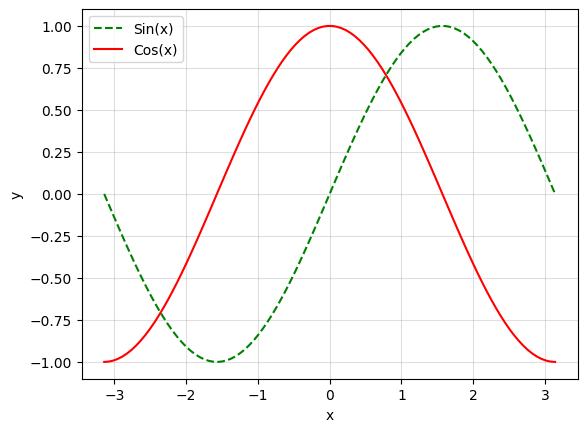

In [8]:
X = np.linspace(-np.pi, np.pi, 100)
Y1 = np.sin(X)
Y2 = np.cos(X)
plt.plot(X, Y1, 'g--', label = 'Sin(x)')
plt.plot(X, Y2, 'r',   label = 'Cos(x)')
plt.grid(alpha = 0.4)
plt.xlabel('x')
plt.ylabel('y')
plt.legend();

5) <a class="anchor" id="task2p5"></a> Анализ данных, попытка предложить формулу оценки надежности

In [9]:
# преобразование всех категорий в числа
status_mod = ['no checking account', '... < 0 DM',
              '0<= ... < 200 DM',
              '... >= 200 DM / salary for at least 1 year']
# duration
credit_history_mod = ['critical account/other credits elsewhere',
                      'delay in paying off in the past', 
                      'existing credits paid back duly till now',
                      'all credits at this bank paid back duly',
                      'no credits taken/all credits paid back duly']
purpose_mod = ['car (used)', 'others', 'retraining',
               'furniture/equipment', 'car (new)', 'business',
               'domestic appliances', 'radio/television', 'repairs',
               'vacation']
# amount
savings_mod = ['unknown/no savings account', '... <  100 DM',
               '100 <= ... <  500 DM', '500 <= ... < 1000 DM',
               '... >= 1000 DM']
employment_duration_mod = ['unemployed', '< 1 yr', '1 <= ... < 4 yrs',
                           '4 <= ... < 7 yrs', '>= 7 yrs']
installment_rate_mod = ['< 20', '20 <= ... < 25', '25 <= ... < 35',
                        '>= 35']
personal_status_sex_mod = ['female : non-single or male : single',
                           'male : married/widowed', 'female : single',
                           'male : divorced/separated']
other_debtors_mod = ['none', 'guarantor', 'co-applicant']
present_residence_mod = ['< 1 yr', '1 <= ... < 4 yrs',
                         '4 <= ... < 7 yrs', '>= 7 yrs']
property_mod = ['car or other', 'unknown / no property',
                'building soc. savings agr./life insurance', 'real estate']
# age
other_installment_plans_mod = ['none', 'bank', 'stores']
housing_mod = ['for free', 'rent', 'own']
number_credits_mod = ['1', '2-3', '4-5', '>= 6']
job_mod = ['unemployed/unskilled - non-resident', 'unskilled - resident',
           'skilled employee/official',
           'manager/self-empl./highly qualif. employee']
people_liable_mod = ['0 to 2', '3 or more']
telephone_mod = ['no', 'yes (under customer name)']
foreign_worker_mod = ['no', 'yes']
credit_risk_mod = ['bad', 'good']

mods = {'status' : lambda x: status_mod.index(x),
        'duration' : lambda x: x,
        'credit_history' : lambda x: credit_history_mod.index(x),
        'purpose' : lambda x: purpose_mod.index(x),
        'amount' : lambda x: x,
        'savings' : lambda x: savings_mod.index(x),
        'employment_duration' : lambda x: employment_duration_mod.index(x),
        'installment_rate' : lambda x: installment_rate_mod.index(x),
        'personal_status_sex' : lambda x: personal_status_sex_mod.index(x),
        'other_debtors' : lambda x: other_debtors_mod.index(x),
        'present_residence' : lambda x: present_residence_mod.index(x),
        'property' : lambda x: property_mod.index(x),
        'age' : lambda x: x,
        'other_installment_plans' : lambda x: other_installment_plans_mod.index(x),
        'housing' : lambda x: housing_mod.index(x),
        'number_credits' : lambda x: number_credits_mod.index(x),
        'job' : lambda x: job_mod.index(x),
        'people_liable' : lambda x: people_liable_mod.index(x),
        'telephone' : lambda x: telephone_mod.index(x),
        'foreign_worker' : lambda x: foreign_worker_mod.index(x),
        'credit_risk' : lambda x: credit_risk_mod.index(x)}

df1 = df0.agg(mods)

In [10]:
df1

,status,duration,credit_history,purpose,amount,savings,employment_duration,installment_rate,personal_status_sex,other_debtors,...,property,age,other_installment_plans,housing,number_credits,job,people_liable,telephone,foreign_worker,credit_risk
0,0,18,3,0,1049,0,1,0,0,0,...,0,21,0,0,0,2,0,0,0,1
1,0,9,3,1,2799,0,2,2,1,0,...,1,36,0,0,1,2,1,0,0,1
2,1,12,4,2,841,1,3,2,0,0,...,1,23,0,0,0,1,0,0,0,1
3,0,12,3,1,2122,0,2,1,1,0,...,1,39,0,0,1,1,1,0,1,1
4,0,12,3,1,2171,0,2,0,1,0,...,0,38,1,1,1,1,0,0,1,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
995,0,24,4,3,1987,0,2,2,1,0,...,1,21,0,0,0,1,1,0,0,0
996,0,24,4,1,2303,0,4,0,1,2,...,1,45,0,1,0,2,0,0,0,0
997,3,21,3,1,12680,4,4,0,1,0,...,3,30,0,2,0,3,0,1,0,0
998,1,12,4,3,6468,4,0,2,1,0,...,3,52,0,1,0,3,0,1,0,0


In [11]:
df1g = df1[df1['credit_risk']==1]
df1b = df1[df1['credit_risk']==0]
df1g.shape, df1b.shape

((700, 21), (300, 21))

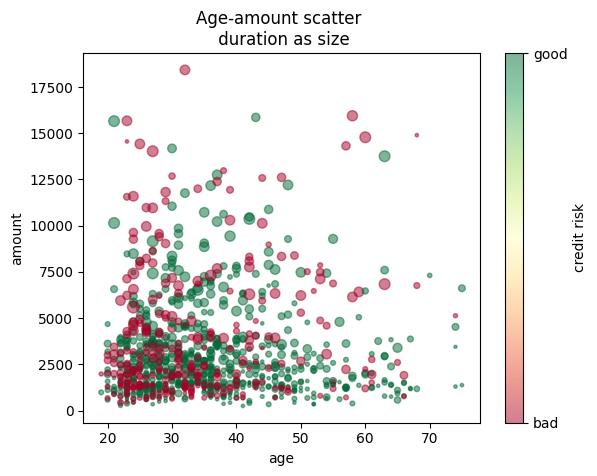

In [12]:
df1.plot.scatter('age','amount','duration','credit_risk', cmap='RdYlGn',
                 alpha = 0.5,
                 title = 'Age-amount scatter \n duration as size')
cbar = plt.gcf().get_axes()[1]
cbar.set(yticks=[0,1], yticklabels=['bad','good'], ylabel='credit risk');

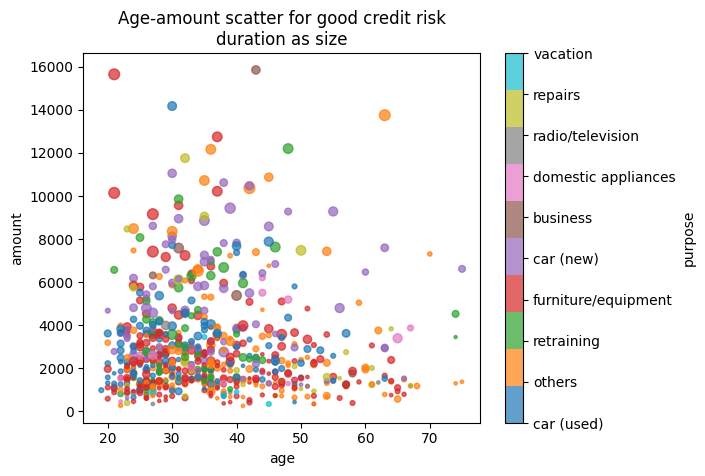

In [13]:
df1g.plot.scatter('age','amount','duration','purpose', cmap='tab10',
                  alpha = 0.7,
                  title = 'Age-amount scatter for good credit risk\n'+
                          'duration as size')
plt.gcf().get_axes()[1].set(yticks = range(len(purpose_mod)), yticklabels=purpose_mod);

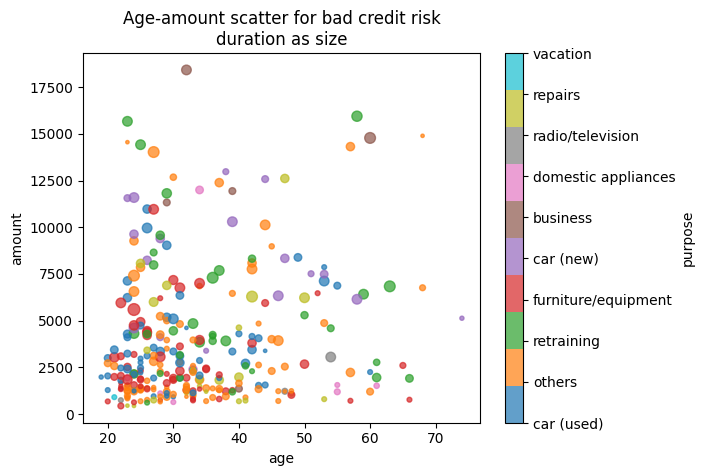

In [14]:
df1b.plot.scatter('age','amount','duration','purpose', cmap='tab10',
                  alpha = 0.7,
                  title = 'Age-amount scatter for bad credit risk\n'+
                          'duration as size')
cbar = plt.gcf().get_axes()[1].set(yticks = range(len(purpose_mod)), yticklabels=purpose_mod);

<p> Спустя несколько дней размышлений я подумал что вполне себе можно попробовать реализовать своего рода нейронную сеть, где под каждый параметр она берет коэффициент соотношения отказов, суммирует их и сравнивает полученное число со средним коэффициентом отказа (опишу его далее). Если оно оказалось больше, то считать кредит одобренным, иначе - не одобренным. </p>
<p> Да, это очень простая модель, у нее есть свои недостатки (отсутствие правильной логики работы с различными параметрами, такими как телефона и кредит, то есть бинарные, порядковые и категориальные факторы оцениваются одинаково; проблемы с анализом количественных факторов), но есть и плюсы в виде простоты реализации и возможностью проверки потом (хотя это относимо к любым нейросетям). </p>
<p> Это не финальное решение и возможно позже оно изменится, но этот блок менять наверное не буду, чтобы оставить последовательность развития мысли</p>
<p> Про средний коэффициент отказа: опишу на примере "status", разбираемым в следующей ячейке. Исходя из предположения, что 1000 это достаточная выборка для различных выводов, то применимо рассуждение: Сумма числа всех событий по всем категориям по определению будет равна 1000. Пускай в выбранную категорию попало n человек, и k из них отказали в предите. $\frac{k}{n}$ берется за коэффициент соотношения отказов. Вес отказа в этой категории будет равен $\frac{k}{n} \cdot \frac{n}{1000}$, что равно $\frac{k}{1000}$. Тогда средний отказ по "status" будет равен сумме $\frac{k}{1000}$ по всем категориям. </p>
<p> (и тут меня осенило...) Тогда эта сумма будет равна в точности $\frac{300}{1000}$, потому что в каждую категорию "status" попадают все элементы таблицы, потому 1000 будет числом всех событий, а 300 будет отказами. Проблема в том, что ровно такая же логика применима к абсолютно каждому столбцу таблицы, а значит что итоговый средний коэффициент отказа по всей таблице будет равен $20 \cdot 0.3 = 6$. И это проблема, ведь такое усреднение вообще не может быть правильным, потому что оно считает все столбцы абсолютно равноценными. А очень наврядли что это так. </p>
<p> Тем не менее других идей у меня пока что нет, так что я попробую хотя бы реализовать эту, а там может чего и придумаю </p>
<p> (Из реализации: сколько-то демонстрирующих графиков, потому что 20 будет много; рассчитать и сохранить все $\frac{k}{n}$ для функции; реализовать функцию через сумму правильных элементов по массиву) </p>
<p> *В связи с выводом, полученным выше, может показаться что количественные факторы можно расценить все также по большим массивам, но это не так, как минимум просто потому что на вход функции можно подать любое число для количественного фактора, что наткнет на проблему "а если этого числа нет". Надо подбирать функцию. </p>

In [15]:
#df1['counter?'] = np.ones(df1.shape[0], dtype = np.int32)
df1 = df1.rename(columns = {'credit_risk': 'approved'})
df1['disapproved'] = 1 - df1['approved']
df1['all cases'] = 1
df1

,status,duration,credit_history,purpose,amount,savings,employment_duration,installment_rate,personal_status_sex,other_debtors,...,other_installment_plans,housing,number_credits,job,people_liable,telephone,foreign_worker,approved,disapproved,all cases
0,0,18,3,0,1049,0,1,0,0,0,...,0,0,0,2,0,0,0,1,0,1
1,0,9,3,1,2799,0,2,2,1,0,...,0,0,1,2,1,0,0,1,0,1
2,1,12,4,2,841,1,3,2,0,0,...,0,0,0,1,0,0,0,1,0,1
3,0,12,3,1,2122,0,2,1,1,0,...,0,0,1,1,1,0,1,1,0,1
4,0,12,3,1,2171,0,2,0,1,0,...,1,1,1,1,0,0,1,1,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
995,0,24,4,3,1987,0,2,2,1,0,...,0,0,0,1,1,0,0,0,1,1
996,0,24,4,1,2303,0,4,0,1,2,...,0,1,0,2,0,0,0,0,1,1
997,3,21,3,1,12680,4,4,0,1,0,...,0,2,0,3,0,1,0,0,1,1
998,1,12,4,3,6468,4,0,2,1,0,...,0,1,0,3,0,1,0,0,1,1


,all cases,approved,disapproved
status,,,
no checking account,274,139,135
... < 0 DM,269,164,105
0<= ... < 200 DM,63,49,14
... >= 200 DM / salary for at least 1 year,394,348,46


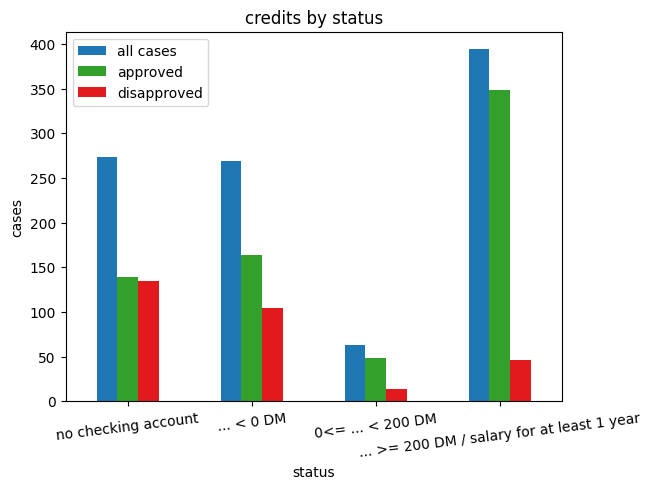

In [16]:
#status
df1tmp = df1[['status', 'all cases', 'approved', 'disapproved']].groupby('status').sum()
status_fac = (df1tmp['disapproved']/df1tmp['all cases']).to_numpy()
df1tmp = df1tmp.rename(index = {i: status_mod[i] for i in range(len(status_mod))})
df1tmp.plot.bar(rot = 7, color={'all cases': '#1f78b4', 'approved': '#34a02c', 'disapproved': '#e31a1d'},
                ylabel = 'cases', title = 'credits by status')
#попытка красиво отобразить таблицу дала мелкий текст, так что костыль..
df1tmp

,all cases,approved,disapproved
duration,,,
4,6,6,0
5,1,1,0
6,75,66,9
7,5,5,0
8,7,6,1
9,49,35,14
10,28,25,3
11,9,9,0
12,179,130,49


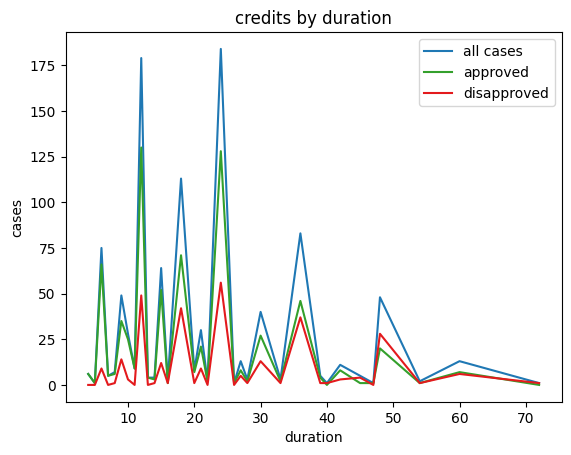

In [17]:
#duration
df1tmp = df1[['duration', 'all cases', 'approved', 'disapproved']].groupby('duration').sum()
#duration_fac = (df1tmp['disapproved']/df1tmp['all cases']).to_numpy()
df1tmp.plot(color={'all cases': '#1f78b4', 'approved': '#34a02c', 'disapproved': '#e31a1d'},
            ylabel = 'cases', title = 'credits by duration')
df1tmp

duration
4     0.000000
5     0.000000
6     0.120000
7     0.000000
8     0.142857
9     0.285714
10    0.107143
11    0.000000
12    0.273743
13    0.000000
14    0.250000
15    0.187500
16    0.500000
18    0.371681
20    0.125000
21    0.300000
22    0.000000
24    0.304348
26    0.000000
27    0.384615
28    0.333333
30    0.325000
33    0.333333
36    0.445783
39    0.200000
40    1.000000
42    0.272727
45    0.800000
47    0.000000
48    0.583333
54    0.500000
60    0.461538
72    1.000000
dtype: float64

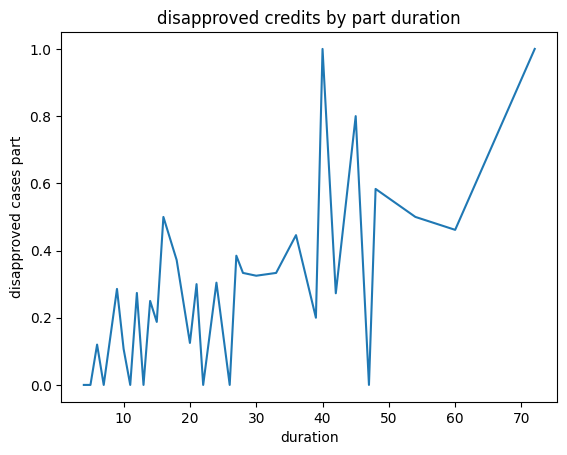

In [18]:
df1tmp_part = df1tmp['disapproved']/df1tmp['all cases']
df1tmp_part.plot(color='#1f78b4', ylabel = 'disapproved cases part',
                 title = 'disapproved credits by part duration')
df1tmp_part

array([-4.71664048e-08, -4.06852033e-06,  1.08111370e-02,  1.48453990e-02])

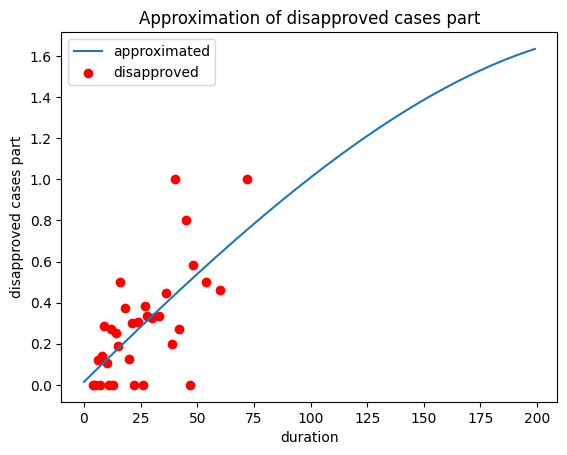

In [19]:
# попытка аппроксимировать функицей
# методом наименьших квадратов к x^3
A = np.array([[x**3, x**2, x, 1] for x in df1tmp_part.index])
B = df1tmp_part.to_numpy()
left = np.transpose(A)@A
right = np.transpose(A)@B
# а вы знали что numpy умеет решать уравнения?
duration_pol = np.linalg.solve(left, right)
duration_func = lambda x: duration_pol[0]*x**3+duration_pol[1]*x**2+\
                          duration_pol[2]*x   +duration_pol[3]

X = np.arange(0, 200)
Y = np.array([duration_func(x) for x in X])
plt.plot(X,Y)
plt.scatter(df1tmp_part.index, B, color = 'Red')
plt.legend(['approximated', 'disapproved'])
plt.xlabel('duration')
plt.ylabel('disapproved cases part')
plt.title('Approximation of disapproved cases part')
duration_pol

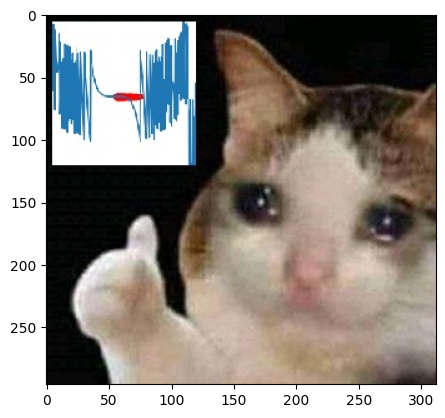

In [20]:
# я столько материала для ячейки выше перекопал..
plt.imshow(plt.imread('./cat.jpg'));
# оно далеко не сразу сработало
# и потому график такой странный (в +-500)
# потому что я много чего перепроверил и перепробовал
# а котика уже поставил, но решил уже не убирать
# (изначально было x^5, а он сразу от нуля в отрицательные уходил)

,all cases,approved,disapproved
credit_history,,,
critical account/other credits elsewhere,49,21,28
delay in paying off in the past,40,15,25
existing credits paid back duly till now,88,60,28
all credits at this bank paid back duly,293,243,50
no credits taken/all credits paid back duly,530,361,169


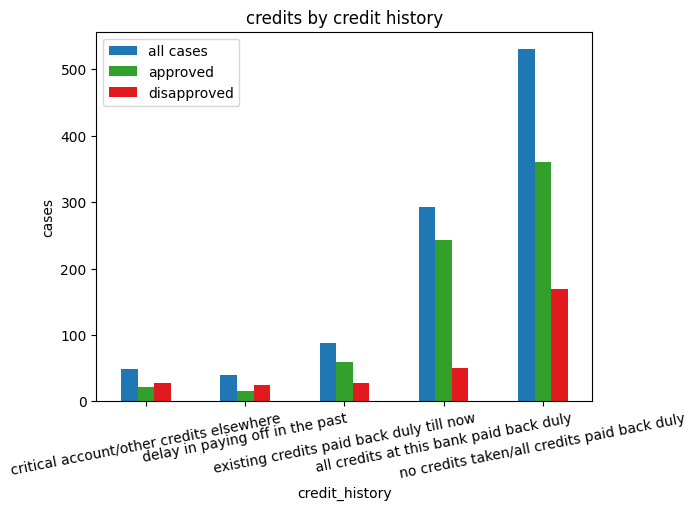

In [21]:
#credit_history
df1tmp = df1[['credit_history', 'all cases', 'approved', 'disapproved']].groupby('credit_history').sum()
credit_history_fac = (df1tmp['disapproved']/df1tmp['all cases']).to_numpy()
df1tmp = df1tmp.rename(index = {i: credit_history_mod[i] for i in range(len(credit_history_mod))})
df1tmp.plot.bar(rot = 11, color={'all cases': '#1f78b4', 'approved': '#34a02c', 'disapproved': '#e31a1d'},
                ylabel = 'cases', title = 'credits by credit history')
df1tmp

,all cases,approved,disapproved
purpose,,,
car (used),181,123,58
others,234,145,89
retraining,97,63,34
furniture/equipment,280,218,62
car (new),103,86,17
business,12,7,5
domestic appliances,22,14,8
radio/television,12,8,4
repairs,50,28,22


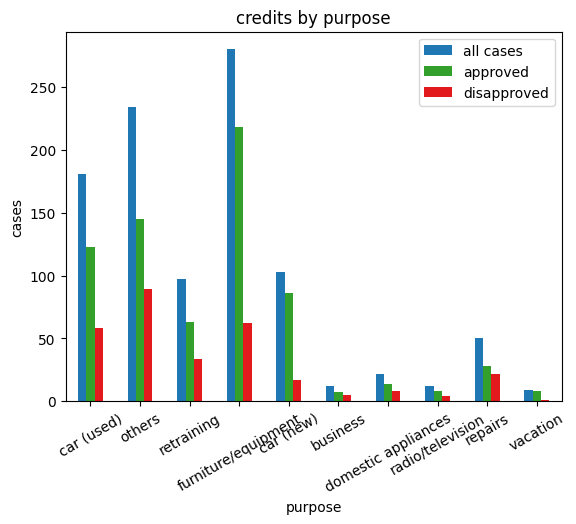

In [22]:
#purpose
df1tmp = df1[['purpose', 'all cases', 'approved', 'disapproved']].groupby('purpose').sum()
purpose_fac = (df1tmp['disapproved']/df1tmp['all cases']).to_numpy()
df1tmp = df1tmp.rename(index = {i: purpose_mod[i] for i in range(len(purpose_mod))})
df1tmp.plot.bar(rot = 30, color={'all cases': '#1f78b4', 'approved': '#34a02c', 'disapproved': '#e31a1d'},
                ylabel = 'cases', title = 'credits by purpose')
df1tmp

In [23]:
#amount

,all cases,approved,disapproved
savings,,,
unknown/no savings account,603,386,217
... < 100 DM,103,69,34
100 <= ... < 500 DM,63,52,11
500 <= ... < 1000 DM,48,42,6
... >= 1000 DM,183,151,32


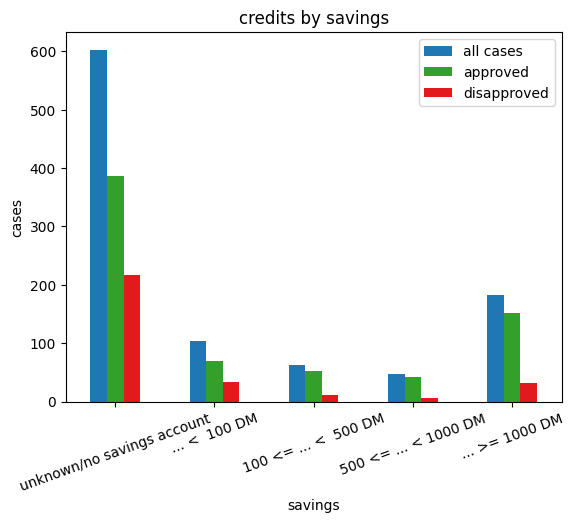

In [24]:
#savings
df1tmp = df1[['savings', 'all cases', 'approved', 'disapproved']].groupby('savings').sum()
savings_fac = (df1tmp['disapproved']/df1tmp['all cases']).to_numpy()
df1tmp = df1tmp.rename(index = {i: savings_mod[i] for i in range(len(savings_mod))})
df1tmp.plot.bar(rot = 20, color={'all cases': '#1f78b4', 'approved': '#34a02c', 'disapproved': '#e31a1d'},
                ylabel = 'cases', title = 'credits by savings')
df1tmp

,all cases,approved,disapproved
employment_duration,,,
unemployed,62,39,23
< 1 yr,172,102,70
1 <= ... < 4 yrs,339,235,104
4 <= ... < 7 yrs,174,135,39
>= 7 yrs,253,189,64


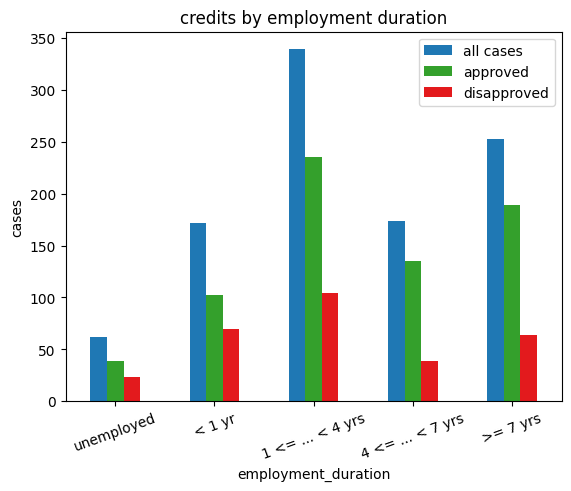

In [25]:
#employment_duration
df1tmp = df1[['employment_duration', 'all cases', 'approved', 'disapproved']].groupby('employment_duration').sum()
employment_duration_fac = (df1tmp['disapproved']/df1tmp['all cases']).to_numpy()
df1tmp = df1tmp.rename(index = {i: employment_duration_mod[i] for i in range(len(employment_duration_mod))})
df1tmp.plot.bar(rot = 20, color={'all cases': '#1f78b4', 'approved': '#34a02c', 'disapproved': '#e31a1d'},
                ylabel = 'cases', title = 'credits by employment duration')
df1tmp

<p> Где-то тут я сперва подумал отобразить все порядковые и бинарные, может тогда идея придет, а потом подумал что чего уж давайте и категориальные тоже. Количественные и так для граффиков надо проанализировать, так что они тоже отображаются. Так что 20 графиков. Йееее.. </p>

,all cases,approved,disapproved
installment_rate,,,
< 20,476,317,159
20 <= ... < 25,157,112,45
25 <= ... < 35,231,169,62
>= 35,136,102,34


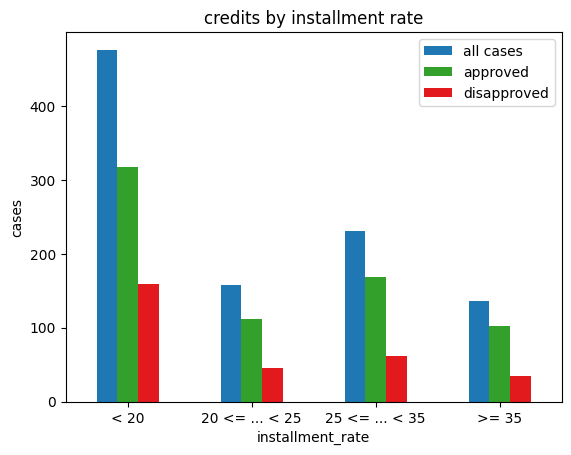

In [26]:
#installment_rate
df1tmp = df1[['installment_rate', 'all cases', 'approved', 'disapproved']].groupby('installment_rate').sum()
installment_rate_fac = (df1tmp['disapproved']/df1tmp['all cases']).to_numpy()
df1tmp = df1tmp.rename(index = {i: installment_rate_mod[i] for i in range(len(installment_rate_mod))})
df1tmp.plot.bar(rot = 0, color={'all cases': '#1f78b4', 'approved': '#34a02c', 'disapproved': '#e31a1d'},
                ylabel = 'cases', title = 'credits by installment rate')
df1tmp

,all cases,approved,disapproved
personal_status_sex,,,
female : non-single or male : single,310,201,109
male : married/widowed,548,402,146
female : single,92,67,25
male : divorced/separated,50,30,20


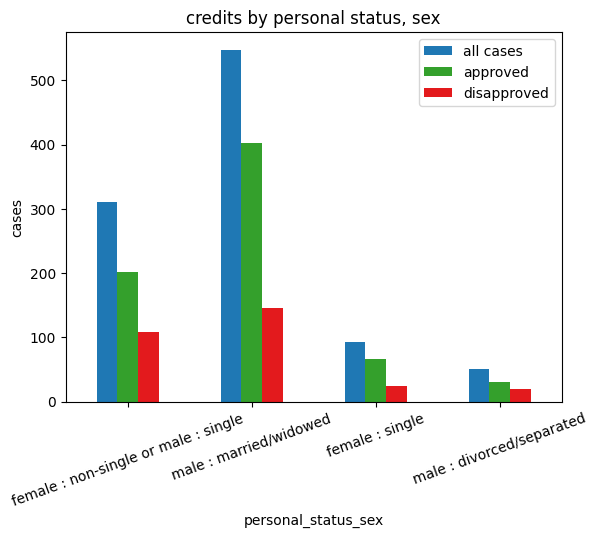

In [27]:
#personal_status_sex
df1tmp = df1[['personal_status_sex', 'all cases', 'approved', 'disapproved']].groupby('personal_status_sex').sum()
personal_status_sex_fac = (df1tmp['disapproved']/df1tmp['all cases']).to_numpy()
df1tmp = df1tmp.rename(index = {i: personal_status_sex_mod[i] for i in range(len(personal_status_sex_mod))})
df1tmp.plot.bar(rot = 20, color={'all cases': '#1f78b4', 'approved': '#34a02c', 'disapproved': '#e31a1d'},
                ylabel = 'cases', title = 'credits by personal status, sex')
df1tmp

,all cases,approved,disapproved
other_debtors,,,
none,907,635,272
guarantor,52,42,10
co-applicant,41,23,18


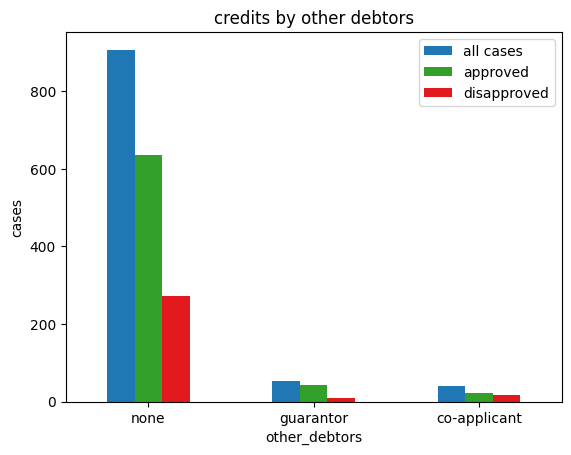

In [28]:
#other_debtors
df1tmp = df1[['other_debtors', 'all cases', 'approved', 'disapproved']].groupby('other_debtors').sum()
other_debtors_fac = (df1tmp['disapproved']/df1tmp['all cases']).to_numpy()
df1tmp = df1tmp.rename(index = {i: other_debtors_mod[i] for i in range(len(other_debtors_mod))})
df1tmp.plot.bar(rot = 0, color={'all cases': '#1f78b4', 'approved': '#34a02c', 'disapproved': '#e31a1d'},
                ylabel = 'cases', title = 'credits by other debtors')
df1tmp

,all cases,approved,disapproved
present_residence,,,
< 1 yr,130,94,36
1 <= ... < 4 yrs,308,211,97
4 <= ... < 7 yrs,149,106,43
>= 7 yrs,413,289,124


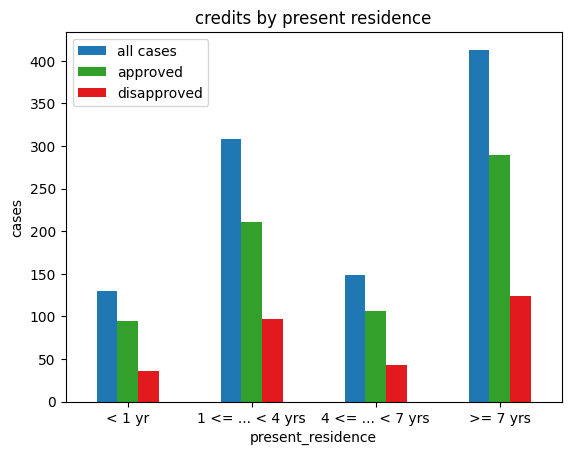

In [29]:
#present_residence
df1tmp = df1[['present_residence', 'all cases', 'approved', 'disapproved']].groupby('present_residence').sum()
present_residence_fac = (df1tmp['disapproved']/df1tmp['all cases']).to_numpy()
df1tmp = df1tmp.rename(index = {i: present_residence_mod[i] for i in range(len(present_residence_mod))})
df1tmp.plot.bar(rot = 0, color={'all cases': '#1f78b4', 'approved': '#34a02c', 'disapproved': '#e31a1d'},
                ylabel = 'cases', title = 'credits by present residence')
df1tmp

<p> *я знаю что можно отображать несколько графиков за раз, но повторюсь, я отображаю их все в попытке что-то найти, какую-то закономерность среди всего этого, чтобы дать более правильное решение </p>

,all cases,approved,disapproved
property,,,
car or other,232,161,71
unknown / no property,282,222,60
building soc. savings agr./life insurance,332,230,102
real estate,154,87,67


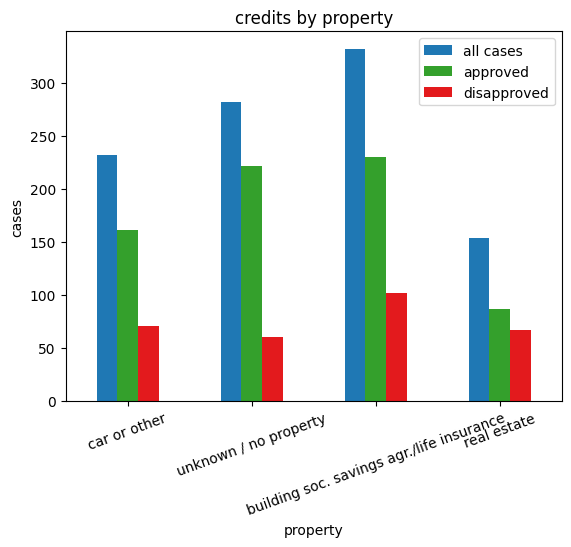

In [30]:
#property
df1tmp = df1[['property', 'all cases', 'approved', 'disapproved']].groupby('property').sum()
property_fac = (df1tmp['disapproved']/df1tmp['all cases']).to_numpy()
df1tmp = df1tmp.rename(index = {i: property_mod[i] for i in range(len(property_mod))})
df1tmp.plot.bar(rot = 20, color={'all cases': '#1f78b4', 'approved': '#34a02c', 'disapproved': '#e31a1d'},
                ylabel = 'cases', title = 'credits by property')
df1tmp

In [31]:
#age

,all cases,approved,disapproved
other_installment_plans,,,
none,814,590,224
bank,139,82,57
stores,47,28,19


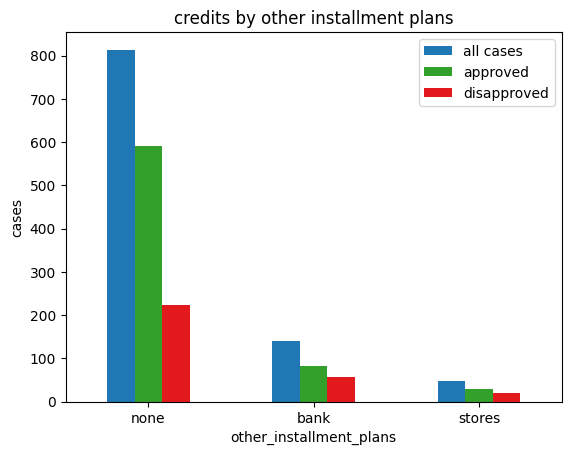

In [32]:
#other_installment_plans
df1tmp = df1[['other_installment_plans', 'all cases', 'approved', 'disapproved']].groupby('other_installment_plans').sum()
other_installment_plans_fac = (df1tmp['disapproved']/df1tmp['all cases']).to_numpy()
df1tmp = df1tmp.rename(index = {i: other_installment_plans_mod[i] for i in range(len(other_installment_plans_mod))})
df1tmp.plot.bar(rot = 0, color={'all cases': '#1f78b4', 'approved': '#34a02c', 'disapproved': '#e31a1d'},
                ylabel = 'cases', title = 'credits by other installment plans')
df1tmp

,all cases,approved,disapproved
housing,,,
for free,179,109,70
rent,714,528,186
own,107,63,44


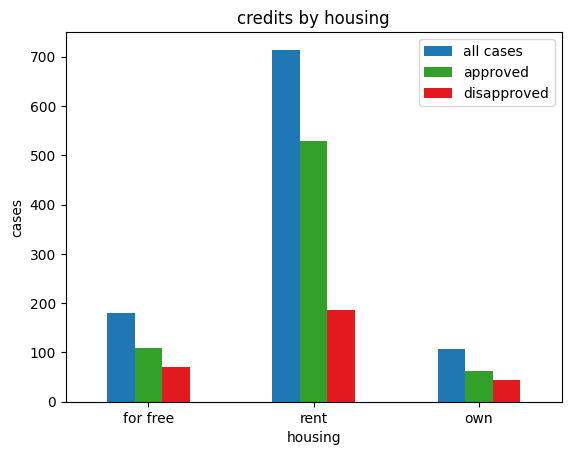

In [33]:
#housing
df1tmp = df1[['housing', 'all cases', 'approved', 'disapproved']].groupby('housing').sum()
housing_fac = (df1tmp['disapproved']/df1tmp['all cases']).to_numpy()
df1tmp = df1tmp.rename(index = {i: housing_mod[i] for i in range(len(housing_mod))})
df1tmp.plot.bar(rot = 0, color={'all cases': '#1f78b4', 'approved': '#34a02c', 'disapproved': '#e31a1d'},
                ylabel = 'cases', title = 'credits by housing')
df1tmp

Потенциальная связь с present_residence

,all cases,approved,disapproved
number_credits,,,
1,633,433,200
2-3,333,241,92
4-5,28,22,6
>= 6,6,4,2


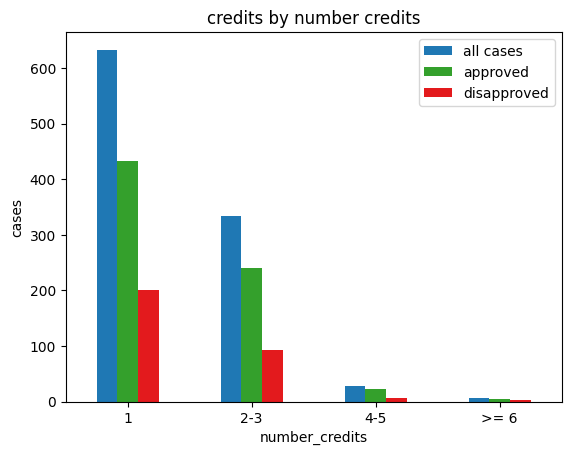

In [34]:
#number_credits
df1tmp = df1[['number_credits', 'all cases', 'approved', 'disapproved']].groupby('number_credits').sum()
number_credits_fac = (df1tmp['disapproved']/df1tmp['all cases']).to_numpy()
df1tmp = df1tmp.rename(index = {i: number_credits_mod[i] for i in range(len(number_credits_mod))})
df1tmp.plot.bar(rot = 0, color={'all cases': '#1f78b4', 'approved': '#34a02c', 'disapproved': '#e31a1d'},
                ylabel = 'cases', title = 'credits by number credits')
df1tmp

,all cases,approved,disapproved
job,,,
unemployed/unskilled - non-resident,22,15,7
unskilled - resident,200,144,56
skilled employee/official,630,444,186
manager/self-empl./highly qualif. employee,148,97,51


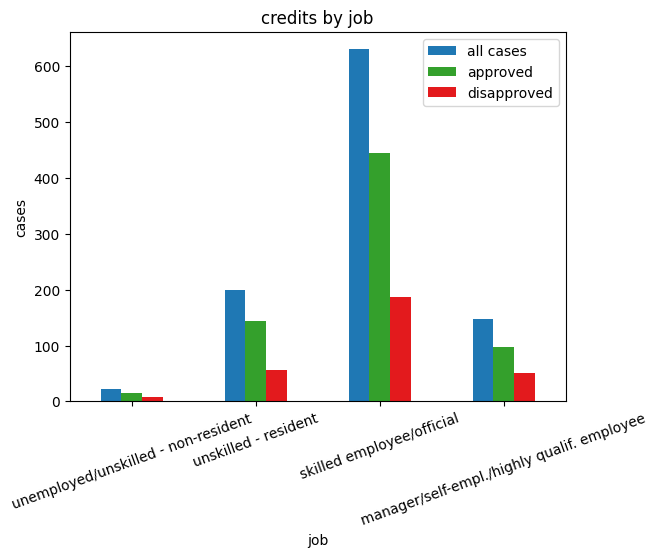

In [35]:
#job
df1tmp = df1[['job', 'all cases', 'approved', 'disapproved']].groupby('job').sum()
job_fac = (df1tmp['disapproved']/df1tmp['all cases']).to_numpy()
df1tmp = df1tmp.rename(index = {i: job_mod[i] for i in range(len(job_mod))})
df1tmp.plot.bar(rot = 20, color={'all cases': '#1f78b4', 'approved': '#34a02c', 'disapproved': '#e31a1d'},
                ylabel = 'cases', title = 'credits by job')
df1tmp

,all cases,approved,disapproved
people_liable,,,
0 to 2,845,591,254
3 or more,155,109,46


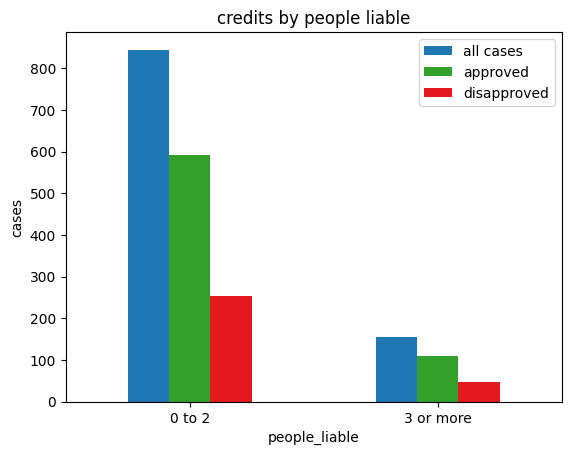

In [36]:
#people_liable
df1tmp = df1[['people_liable', 'all cases', 'approved', 'disapproved']].groupby('people_liable').sum()
people_liable_fac = (df1tmp['disapproved']/df1tmp['all cases']).to_numpy()
df1tmp = df1tmp.rename(index = {i: people_liable_mod[i] for i in range(len(people_liable_mod))})
df1tmp.plot.bar(rot = 0, color={'all cases': '#1f78b4', 'approved': '#34a02c', 'disapproved': '#e31a1d'},
                ylabel = 'cases', title = 'credits by people liable')
df1tmp

,all cases,approved,disapproved
telephone,,,
no,596,409,187
yes (under customer name),404,291,113


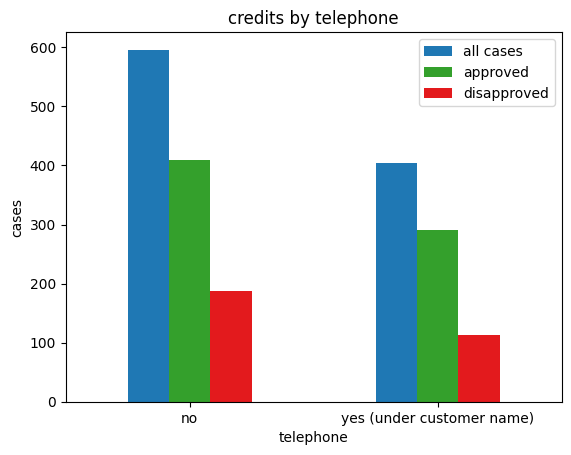

In [37]:
#telephone
df1tmp = df1[['telephone', 'all cases', 'approved', 'disapproved']].groupby('telephone').sum()
telephone_fac = (df1tmp['disapproved']/df1tmp['all cases']).to_numpy()
df1tmp = df1tmp.rename(index = {i: telephone_mod[i] for i in range(len(telephone_mod))})
df1tmp.plot.bar(rot = 0, color={'all cases': '#1f78b4', 'approved': '#34a02c', 'disapproved': '#e31a1d'},
                ylabel = 'cases', title = 'credits by telephone')
df1tmp

,all cases,approved,disapproved
foreign_worker,,,
no,963,667,296
yes,37,33,4


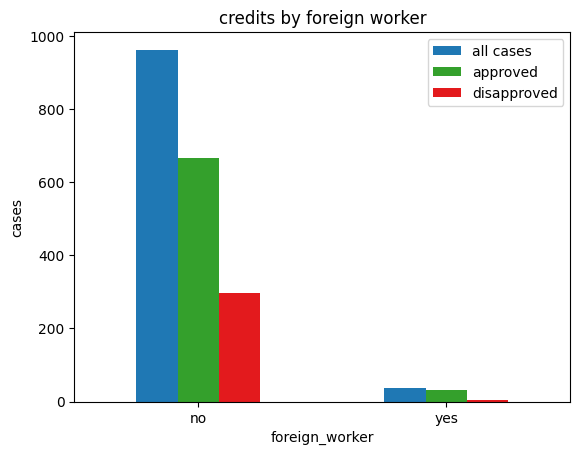

In [38]:
#foreign_worker
df1tmp = df1[['foreign_worker', 'all cases', 'approved', 'disapproved']].groupby('foreign_worker').sum()
foreign_worker_fac = (df1tmp['disapproved']/df1tmp['all cases']).to_numpy()
df1tmp = df1tmp.rename(index = {i: foreign_worker_mod[i] for i in range(len(foreign_worker_mod))})
df1tmp.plot.bar(rot = 0, color={'all cases': '#1f78b4', 'approved': '#34a02c', 'disapproved': '#e31a1d'},
                ylabel = 'cases', title = 'credits by foreign worker')
df1tmp

In [39]:
fac = [status_fac, credit_history_fac, purpose_fac, savings_fac,
       employment_duration_fac, installment_rate_fac, personal_status_sex_fac, other_debtors_fac,
       present_residence_fac, property_fac, other_installment_plans_fac, housing_fac,
       number_credits_fac, job_fac, people_liable_fac, telephone_fac, foreign_worker_fac]
fac_names = ['status', 'credit_history', 'purpose', 'savings', 'employment_duration', 'installment_rate',
             'personal_status_sex', 'other_debtors', 'present_residence', 'property', 'other_installment_plans',
             'housing', 'number_credits', 'job', 'people_liable', 'telephone', 'foreign_worker']
''' fac = [status_fac, duration_fac, credit_history_fac, purpose_fac, amount_fac, savings_fac,
       employment_duration_fac, installment_rate_fac, personal_status_sex_fac, other_debtors_fac,
       present_residence_fac, property_fac, age_fac, other_installment_plans_fac, housing_fac,
       number_credits_fac, job_fac, people_liable_fac, telephone_fac, foreign_worker_fac] '''
for i in range(len(fac)): print('%s :'%fac_names[i], '  '.join(['%.3f'%j for j in fac[i]]))

status : 0.493  0.390  0.222  0.117
credit_history : 0.571  0.625  0.318  0.171  0.319
purpose : 0.320  0.380  0.351  0.221  0.165  0.417  0.364  0.333  0.440  0.111
savings : 0.360  0.330  0.175  0.125  0.175
employment_duration : 0.371  0.407  0.307  0.224  0.253
installment_rate : 0.334  0.287  0.268  0.250
personal_status_sex : 0.352  0.266  0.272  0.400
other_debtors : 0.300  0.192  0.439
present_residence : 0.277  0.315  0.289  0.300
property : 0.306  0.213  0.307  0.435
other_installment_plans : 0.275  0.410  0.404
housing : 0.391  0.261  0.411
number_credits : 0.316  0.276  0.214  0.333
job : 0.318  0.280  0.295  0.345
people_liable : 0.301  0.297
telephone : 0.314  0.280
foreign_worker : 0.307  0.108
